In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Load dataset from csv file using pandas
df = pd.read_csv('E:\datasets\Crop Recommendation Dataset\crop_recommendation.csv')

### Print the first 5 rows of the dataset
print(df.head())
print(df.shape)

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
(2200, 8)


In [4]:
# print intervals of each feature
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


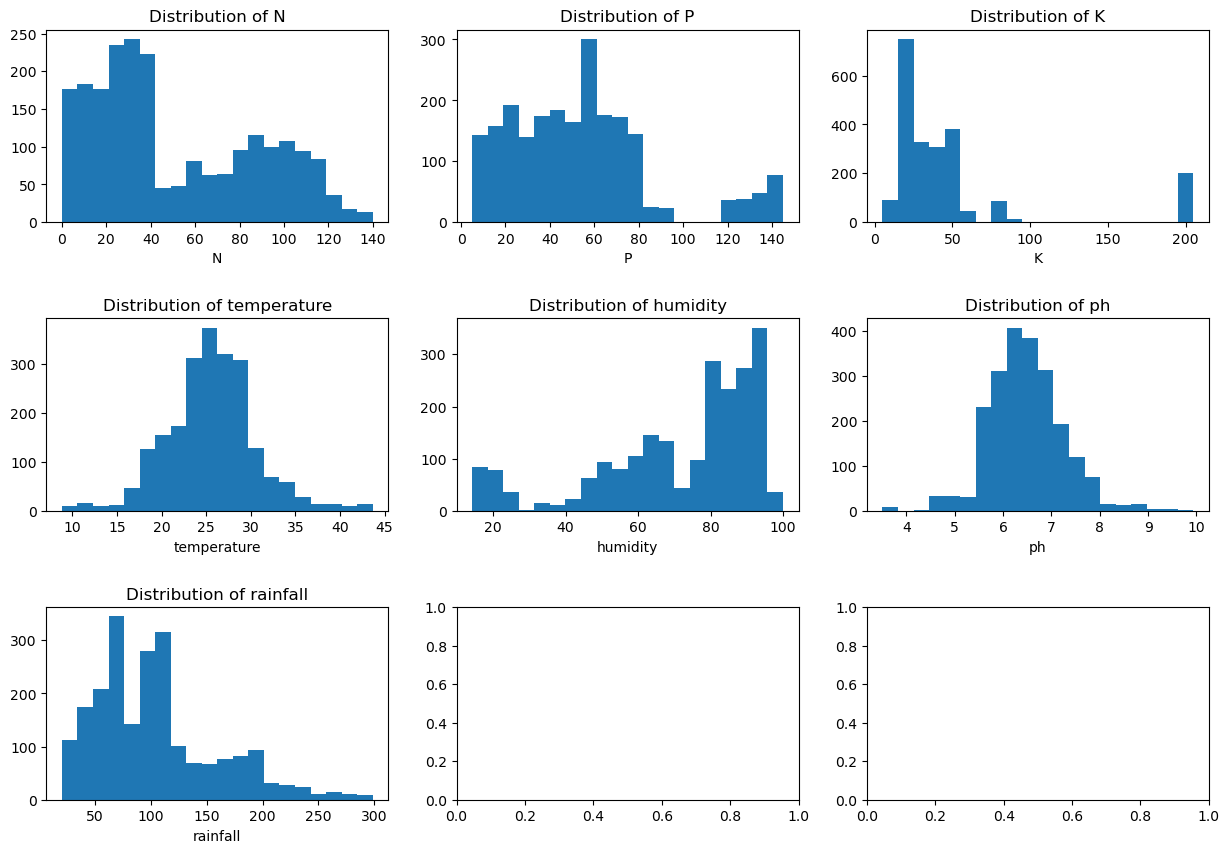

In [13]:
# create 3 subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(df.columns[:-1]):
    ax[i//3, i%3].hist(df[feature], bins=20)
    ax[i//3, i%3].set_xlabel(feature)
    ax[i//3, i%3].set_title('Distribution of {}'.format(feature))

In [26]:
# split dataset into train, test and validation sets
from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis=1)
y = df['label']

# split dataset into train, test and validation sets 70 20 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125)

# print the shape of the train, test and validation sets
print(X_train.shape, X_test.shape, X_val.shape)

(1540, 7) (440, 7) (220, 7)


In [27]:
# normalize the data using z score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [28]:
# transform output labels to one hot encoded format
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.values.reshape(-1, 1)).toarray()
y_val = encoder.transform(y_val.values.reshape(-1, 1)).toarray()

In [32]:
# print some input and output values
print(X_train[0], y_train[0])

# print y_train shape
print(y_train.shape)

[-0.48865216  2.51194423  3.03624798 -0.54715998  0.95992291 -0.83726186
  0.24646005] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1540, 22)


Epoch 1/100
49/49 [==============================] - 1s 9ms/step - loss: 2.8499 - accuracy: 0.1922 - val_loss: 2.5592 - val_accuracy: 0.3591
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: 2.3139 - accuracy: 0.4253 - val_loss: 2.0808 - val_accuracy: 0.5545
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 1.8346 - accuracy: 0.6175 - val_loss: 1.6507 - val_accuracy: 0.6636
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 1.4300 - accuracy: 0.7474 - val_loss: 1.3052 - val_accuracy: 0.7455
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 1.1192 - accuracy: 0.8227 - val_loss: 1.0434 - val_accuracy: 0.7682
Epoch 6/100
49/49 [==============================] - 0s 3ms/step - loss: 0.8926 - accuracy: 0.8727 - val_loss: 0.8572 - val_accuracy: 0.8136
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 0.7336 - accuracy: 0.8838 - val_loss: 0.7201 - val_accuracy: 0.8727
Epoch 8/100
4

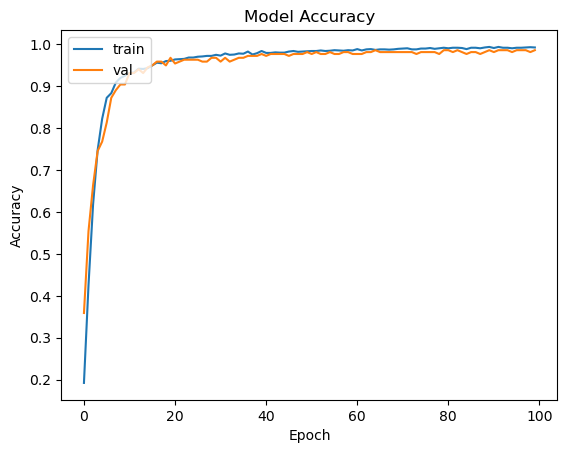

In [37]:
# train a NN model using tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(7,)))
# add output layer
model.add(Dense(22, activation='softmax'))

# compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
# test on test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {}'.format(accuracy))

14/14 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9864
Test accuracy: 0.9863636493682861
